In [1]:
#Importing packages for task completion 

import pandas as pd 
from scipy.stats import chi2_contingency 
import matplotlib.pyplot as plt 

#In completing this task, I adapted sections of the lab tasks and sample code provided by our lecturer Georgiana Ifrim. 

Part 1: Preparing the data quality report.

I first read the csv file in from the data frame, then use df.shape to print the total rows and columns in the dataset. Doing this will allow me to know how large the dataset is. 

In [2]:
#To begin, I read the csv file in from the data frame. 
df = pd.read_csv('covid19-cdc-23222213.csv')

#Checking total rows and columns are in the dataframe
print(f"Number of rows and columns: {df.shape}")

#To double check, I will print the number of rows/instances.
print(f"Confirming number of rows: {df.shape[0]}")

#And also print the number of columns/features.
print(f"Confirming number of columns: {df.shape[1]}")

Number of rows and columns: (50000, 19)
Confirming number of rows: 50000
Confirming number of columns: 19


From the initial viewing it is clear that this dataset is quite large, as it contains 5,000 rows and 19 columns. 

I will also view the first and last five rows of the dataframe (in that order) in order to gain an initial understanding of the file content. 

In [3]:
# Showing the first 5 rows of the data frame
df.head(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-01,NC,37.0,FORSYTH,37067.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Unknown,Yes,NaN
1,2021-12,CA,6.0,LOS ANGELES,6037.0,65+ years,Male,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,Yes,NaN
2,2020-12,CA,6.0,LOS ANGELES,6037.0,50 to 64 years,Male,White,Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,Yes,NaN
3,2020-11,MN,27.0,NOBLES,27105.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Yes,Yes
4,2020-03,IL,17.0,COOK,17031.0,50 to 64 years,Male,Black,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN


In [4]:
# Showing last 5 rows of data frame
df.tail(5)                                 

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
49995,2020-12,AZ,4.0,YAVAPAI,4025.0,18 to 49 years,Male,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
49996,2020-06,AZ,4.0,PINAL,4021.0,50 to 64 years,Female,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
49997,2021-12,NY,36.0,SUFFOLK,36103.0,18 to 49 years,Female,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
49998,2021-08,NC,37.0,ROCKINGHAM,37157.0,50 to 64 years,Male,Black,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Unknown,No,NaN
49999,2022-01,NY,36.0,WESTCHESTER,36119.0,18 to 49 years,Male,Missing,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN


Now, I will view the data types of each column.

In [5]:
df.dtypes #print type for each column

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

To help decide which columns should be continuous and which should be categorical, I will check the unique values of each column by iterating through them. The categorical variables should have a relatively low number of unique values (compared to the size of the database).

In [6]:
for col in df.columns:
    unique_values = df[col].nunique()
    print(f"{col}: {unique_values} unique values")

case_month: 40 unique values
res_state: 52 unique values
state_fips_code: 52 unique values
res_county: 962 unique values
county_fips_code: 1376 unique values
age_group: 5 unique values
sex: 4 unique values
race: 8 unique values
ethnicity: 4 unique values
case_positive_specimen_interval: 80 unique values
case_onset_interval: 64 unique values
process: 9 unique values
exposure_yn: 3 unique values
current_status: 2 unique values
symptom_status: 4 unique values
hosp_yn: 4 unique values
icu_yn: 4 unique values
death_yn: 2 unique values
underlying_conditions_yn: 2 unique values


The above details are broadly in line with what I would have expected. While 'case_month' containing 40 unique values was at first puzzling - I initially expected a count of 12 unique values - a recheck of the printed rows showed that this column details both the year and month. 

The other intriguing value in the dataset was the contrast between the count of 'res_county' and 'county_fips_code'. I would have assumed that these counts should be in line with one another. In order to better understand this variable, I have done some external reading (from https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt) and have come to understand that this code is a five digit unique identifier for each county in the USA. Some counties have multiple FIPS codes (due to boundary changes etc) and it is possible that non-county FIPS codes may have been entered (such as the FIPS code of a city or similar). In addition, some county names may repeat across multiple states, while the FIPS code will be unique. For this reason, it is understandable that the 'county_fips_code' may have a higher count than the 'res_county'.

In order to better understand the stats, I would like to print the stats for the continuous (numeric) columns. I will also transpose the generated table, in order to improve the legibility of the data. 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
state_fips_code,50000.0,29.803900,13.087114,1.0,20.0,34.0,37.0,78.0
county_fips_code,47170.0,29832.159084,12953.433319,1001.0,20091.0,34023.0,37183.0,56041.0
case_positive_specimen_interval,26198.0,0.166120,2.509021,-115.0,0.0,0.0,0.0,111.0
case_onset_interval,21322.0,-0.035597,1.919930,-88.0,0.0,0.0,0.0,99.0


The 'count' variable is of particular interest here. I already know that this dataset contains 5,000 rows. However, only one of the items (state_fips_code) has a count of 5,000. This suggests that there are missing values in the data set. I then referred to https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4 , as provided in the homework assignment Jupyter notebook. 

From this, I learned that unanswered questions on the CDC case report forms had been reclassified to 'Missing', which explains why there is such a high incidence of missing values in the dataset.

It's also interesting to note that 'case_onset_interval' and 'case_positive_specimen_interval' contain negative values. 

Given that I now know that there is a high incidence of missing values in the continuous data types, it makes sense to check the total count in all columns, then sum the count of missing data for each column. 

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case_month                       50000 non-null  object 
 1   res_state                        50000 non-null  object 
 2   state_fips_code                  50000 non-null  float64
 3   res_county                       47170 non-null  object 
 4   county_fips_code                 47170 non-null  float64
 5   age_group                        49613 non-null  object 
 6   sex                              48905 non-null  object 
 7   race                             43795 non-null  object 
 8   ethnicity                        43202 non-null  object 
 9   case_positive_specimen_interval  26198 non-null  float64
 10  case_onset_interval              21322 non-null  float64
 11  process                          50000 non-null  object 
 12  exposure_yn       

In [9]:
#Sum missing data of all features
df.isnull().sum()

case_month                             0
res_state                              0
state_fips_code                        0
res_county                          2830
county_fips_code                    2830
age_group                            387
sex                                 1095
race                                6205
ethnicity                           6798
case_positive_specimen_interval    23802
case_onset_interval                28678
process                                0
exposure_yn                            0
current_status                         0
symptom_status                         0
hosp_yn                                0
icu_yn                                 0
death_yn                               0
underlying_conditions_yn           45952
dtype: int64

As expected, a cursory glance at the above shows that multiple columns contain missing entries (as many do not have a non-null count of 5,000). This will be useful information for later in my report. 

I now will move on to converting the columns to their appropriate data types (continuous or categorical). I plan to store all the strings (objects) as categorical data and maintain the float data as continuous data. 

I initially planned to convert 'case_month' to continuous data, however in the absence of a day value (it only contains a month and year), this is not possible. 

In [10]:
#Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns

#Convert object data to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')  

df.dtypes #reprint all data frame types as a check 

case_month                         category
res_state                          category
state_fips_code                     float64
res_county                         category
county_fips_code                    float64
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

From the above, it's clear that the string data is now stored correctly as categorical and as the float data is already of continuous numerical type, no change is needed there. 

I will now check for duplicated rows and columns in the dataset, using the duplicate() method. 

In [11]:
#First checking for duplicate columns
# Transpose the DataFrame
transposed_df = df.transpose()

# Check for duplicate columns
duplicate_columns = transposed_df[transposed_df.duplicated()]

# Print out duplicate columns
if not duplicate_columns.empty:
    print("Duplicate columns:")
    print(duplicate_columns)
else:
    print("No duplicate columns found.")


No duplicate columns found.


In [12]:
#Now checking for duplicate rows. 
duplicate_rows = df[df.duplicated()]

# Print out duplicate rows
if not duplicate_rows.empty:
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate rows:
      case_month res_state  state_fips_code      res_county  county_fips_code  \
221      2021-07        TX             48.0          DALLAS           48113.0   
265      2020-12        NJ             34.0          BERGEN           34003.0   
384      2020-12        FL             12.0      MIAMI-DADE           12086.0   
420      2021-10        CA              6.0     LOS ANGELES            6037.0   
455      2021-10        AZ              4.0        MARICOPA            4013.0   
...          ...       ...              ...             ...               ...   
49973    2021-12        MN             27.0      WASHINGTON           27163.0   
49985    2022-05        MD             24.0  BALTIMORE CITY           24510.0   
49988    2022-01        MT             30.0             NaN               NaN   
49997    2021-12        NY             36.0         SUFFOLK           36103.0   
49999    2022-01        NY             36.0     WESTCHESTER           36119.0   

           

This is evidence that there are many duplicated rows (and no duplicated columns, as per the preceding code cell). 

I have opted to keep the first instance of each duplicated row and delete the rest. I have included a check afterwards to ensure that the duplicates have been removed. 

In [13]:
# Dropping duplicate rows, keeping the first instance
df.drop_duplicates(inplace=True)

# Checking if any duplicates remain after dropping
if df.duplicated().any():
    print("Duplicate rows still exist after dropping.")
else:
    print("No duplicate rows found after dropping.")


No duplicate rows found after dropping.


As seen above, the duplicates have now been removed. 

I have now completed the initial data preparation steps (as per the assignment brief) and now must save the updated data file to a new CSV frame. 

In [14]:
# Utilising the pandas method 'to_csv()' to save updated data. 
df.to_csv('cleaned_data.csv', index=False)

For the next task, I will generate descriptive stats for the all the continuous features of the dataframe. In order to maximise initial understanding, I am using the pandas styler class. 

In [37]:
# Select the continuous features
continuous_features = df.select_dtypes(include=['float64', 'int64'])

# Descriptive statistics for continuous features
descriptive_stats = continuous_features.describe()

# Styling the descriptive statistics
styled_descriptive_stats = descriptive_stats.style.format("{:.2f}").\
    set_caption("Descriptive Statistics for Continuous Features").\
    set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '16px'), ('font-weight', 'bold')]
    }])

# Printing out the stats
styled_descriptive_stats

,state_fips_code,county_fips_code,case_positive_specimen_interval,case_onset_interval
count,45325.00,42673.00,24238.00,20100.00
mean,30.09,30133.84,0.18,-0.04
std,13.00,12861.03,2.61,1.98
min,1.00,1001.00,-115.00,-88.00
25%,20.00,20169.00,0.00,0.00
50%,34.00,34023.00,0.00,0.00
75%,39.00,37193.00,0.00,0.00
max,78.00,56041.00,111.00,99.00


From a quick visual inspection of the above, there are some areas to note and potentially investigate further. 

In 'case_positive_specimen_interval': 
- minimum value -115 implies negative values, which could be erroneous or show data issues. 
- having a max value of 111 also seems very large. 
- the standard deviation implies a large variance. 
- the mean value is low and could indicate that the time between gathering the data and confirming the case was quite short. 

In 'case_onset_interval': 
- the mean value is slightly negative, which appears to mean that the cases were confirmed before symptoms began (considering how widespread COVID testing was, this isn't unexpected). 
- the standard deviation is very large, implying a wide range. 
- the minimum value (-88) is very unexpected and probably implies some erroneous data entry or other issues. 
- the maximum value (99) seems quite large. 


Before moving further on this task, I will compute an %missing and a cardinality table.I will then concatenate the newly generated data with the original information.  

In [38]:
#Creating the %missing data 
# Defining each column name to call in 
continuous_features = ['state_fips_code', 'county_fips_code', 'case_positive_specimen_interval', 'case_onset_interval']  

# Prepare %missing data frame
continuous_columns_missing = 100 * (df[continuous_features].isnull().sum() / df.shape[0])

# Store and print out data frame with info 
df_numeric_missing = pd.DataFrame(continuous_columns_missing, columns=['%missing'])
df_numeric_missing


,%missing
state_fips_code,0.000000
county_fips_code,5.851076
case_positive_specimen_interval,46.523993
case_onset_interval,55.653613


Some notes from the above: 
- 'state_fips_code' is ideal as there are no missing values in this column. 
- while 'county_fips_code' is relatively complete, it is still missing a certain amount of data. 
- 'case_positive_specimen_interval' and 'case_onset_interval' both have high percentages of missing values. 

In [20]:
#Adding cardinality information
continuous_columns_card = df[continuous_features].nunique()
# store the values in a dataframe
df_continuous_card = pd.DataFrame(continuous_columns_card, columns=['card'])
df_continuous_card

,card
state_fips_code,52
county_fips_code,1376
case_positive_specimen_interval,80
case_onset_interval,64


Some notes from the above: 
- It is interesting that there are 52 values for 'state_fips_code', as there are 50 states in the USA. 
- The 'county_fips_code' has a high cardinality, which is to be expected considering the size of the USA and the number of counties in it. 
- Both 'case_onset_interval' and 'case_positive_specimen_interval' have multiple unique values. For 'case_onset_interval', this suggests that there was a variance in the case detection and system onset. Similarly, for 'case_positive_specimen_interval', there is a range of intervals represented in the data. 


I will now generate the %missing, the cardinality and combine all of the table information together. 

In [43]:
# Missing values column for the table 
df_table_numeric = df[continuous_features].describe().T

# Combine all columns 
df_numeric_columns_data_quality_report_table = pd.concat([df_table_numeric, df_numeric_missing, df_continuous_card], axis=1)

# Print the generated table to a file. 
df_numeric_columns_data_quality_report_table.to_csv("CovidData-DataQualityReport-ContinuousFeaturesDescriptive-Table.csv", 
                                         index_label='Feature')
df_numeric_columns_data_quality_report_table

,count,mean,std,min,25%,50%,75%,max,%missing,card
state_fips_code,45325.0,30.087170,12.999320,1.0,20.0,34.0,39.0,78.0,0.000000,52
county_fips_code,42673.0,30133.844164,12861.032019,1001.0,20169.0,34023.0,37193.0,56041.0,5.851076,1376
case_positive_specimen_interval,24238.0,0.177036,2.607726,-115.0,0.0,0.0,0.0,111.0,46.523993,80
case_onset_interval,20100.0,-0.036965,1.977101,-88.0,0.0,0.0,0.0,99.0,55.653613,64


I will now prepare the descriptive stats for the categorical features. 

In [40]:
#An initial look at the values of the category (object) data. 
df[object_columns].describe().T

,count,unique,top,freq
case_month,45325,40,2022-01,5292
res_state,45325,52,NY,4738
res_county,42673,962,MIAMI-DADE,851
age_group,44942,5,18 to 49 years,17855
sex,44246,4,Female,23087
race,39511,8,White,27561
ethnicity,38920,4,Non-Hispanic/Latino,26931
process,45325,9,Missing,40858
exposure_yn,45325,3,Missing,38643
current_status,45325,2,Laboratory-confirmed case,37782


From the above, there doesn't appear to be any glaring irregularities in the categorical features. There are some missing elements in the data set, as was established earlier in this process. 

In order to use this in my data quality report, I would like to style it appealingly, which I will do below. 

In [44]:
# Prepare %missing column for the categorical data 
category_columns_perc_missing  = 100 * (df[object_columns].isnull().sum()/df.shape[0])

# Store the values in a dataframe and then print out the result for examination
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

,%missing
case_month,0.000000
res_state,0.000000
res_county,5.851076
age_group,0.845008
sex,2.380585
race,12.827358
ethnicity,14.131274
process,0.000000
exposure_yn,0.000000
current_status,0.000000


As expected, there is a high incidence of %missing in certain columns such as sex, race and ethnicity. According to the CDC website (https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4), fields left blank on the recording forms were recorded as Missing - which helps to explain the high incidence of Missing values in the data set. 

I will now generate a column for the cardinality of the categorical data. 

In [45]:
# Cardinality column for the descriptive data 
category_columns_card = df[object_columns].nunique()
# store the values in a dataframe
df_category_card = pd.DataFrame(category_columns_card, columns=['card'])
df_category_card

,card
case_month,40
res_state,52
res_county,962
age_group,5
sex,4
race,8
ethnicity,4
process,9
exposure_yn,3
current_status,2


The above cardinality column is broadly in line with what I would have expected for the dataset. At present, I can not see any areas that need further investigation. 

I will now combine the cardinality and %missing columns with the previously generated table. I will then save the completed table in order to use it for the data quality report. 

In [46]:
# Adding the missing values column
df_table_categ = df[object_columns].describe().T

# Combine the columns to prepare the final table. 
df_category_columns_data_quality_report_table = pd.concat([df_table_categ, df_category_perc_missing, df_category_card], axis=1)

# Print data quality report table for categorical features and save it to a file. 
df_category_columns_data_quality_report_table.to_csv("CovidData-DataQualityReport-CategoryFeaturesDescriptive-Table.csv", 
                                         index_label='Feature')
df_category_columns_data_quality_report_table

,count,unique,top,freq,%missing,card
case_month,45325,40,2022-01,5292,0.000000,40
res_state,45325,52,NY,4738,0.000000,52
res_county,42673,962,MIAMI-DADE,851,5.851076,962
age_group,44942,5,18 to 49 years,17855,0.845008,5
sex,44246,4,Female,23087,2.380585,4
race,39511,8,White,27561,12.827358,8
ethnicity,38920,4,Non-Hispanic/Latino,26931,14.131274,4
process,45325,9,Missing,40858,0.000000,9
exposure_yn,45325,3,Missing,38643,0.000000,3
current_status,45325,2,Laboratory-confirmed case,37782,0.000000,2


I will now plot histograms for all the continuous features. 

<Figure size 640x480 with 0 Axes>

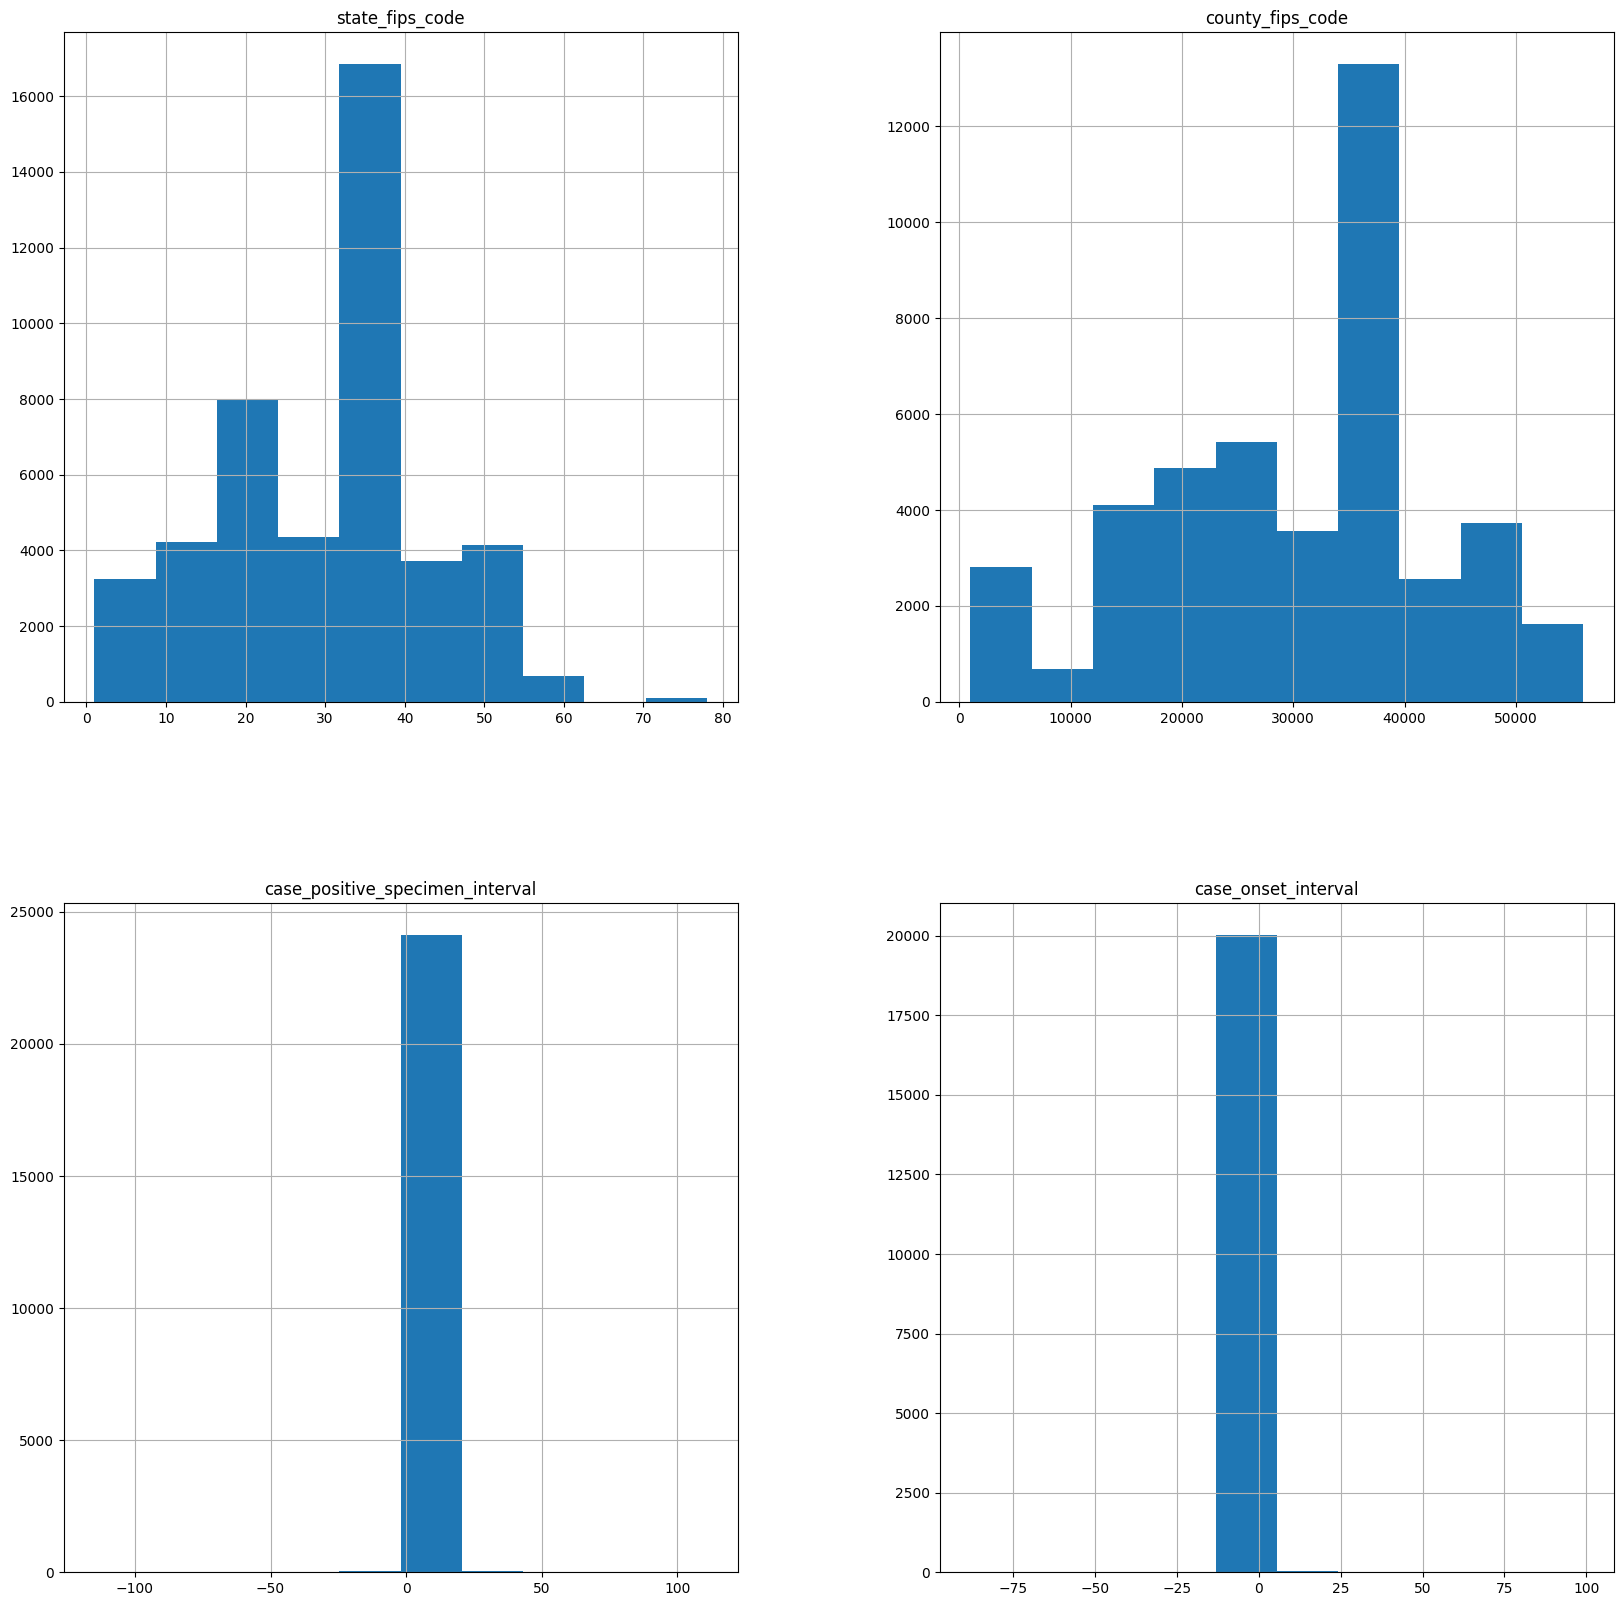

In [51]:
plt.figure()
df.hist(figsize=(20, 20))

#Saving the plotted histograms into a file.
plt.savefig('CovidData-DataQualityReport-ContinuousFeatures-Histograms.png')

Clearly, there are issues within the histograms generated above - specifically the 'case_onset_interval' and 'case_positive_specimen_interval' charts. This data may need to be transformed via algorithms or be visualised in another way (such as a density plot), in order to understand the data distribution. 

I will now plot box plots for all the continuous features. I initially tried to visualise these on one graph but it was not effective - I will show the results of it below. 

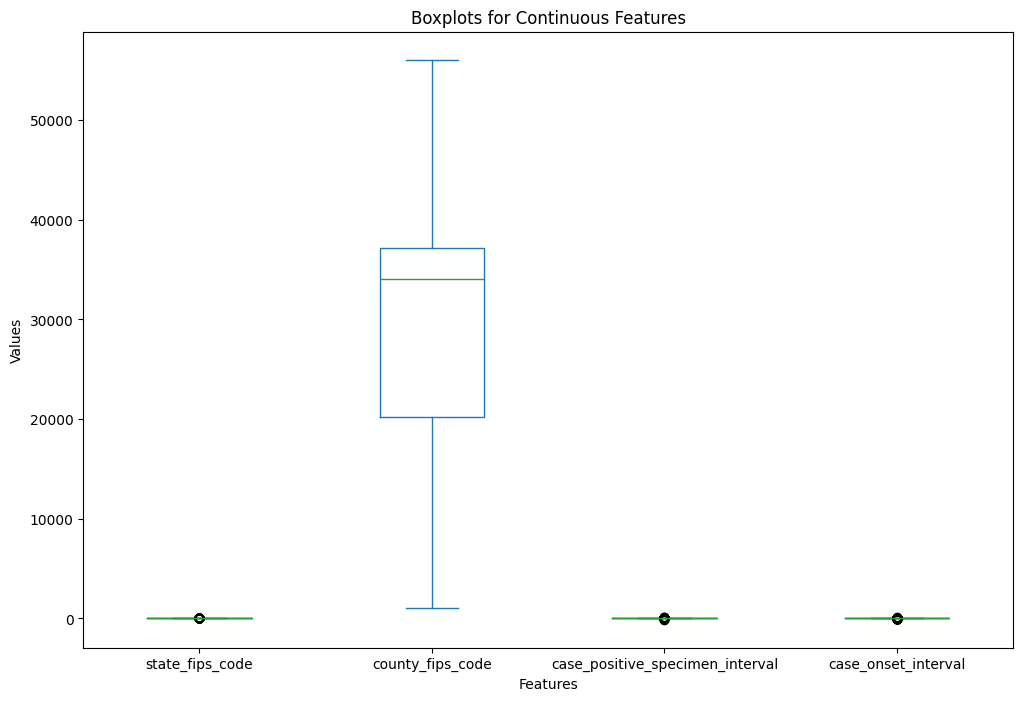

In [56]:
# Plot boxplot for each continuous feature
df[['state_fips_code', 'county_fips_code', 'case_positive_specimen_interval', 'case_onset_interval']].plot(kind='box', figsize=(12, 8))

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplots for Continuous Features')

# Display boxplots on one page 
plt.show()

As can be seen above, the size of 'county_fips_code' renders the other boxplots unreadable. Therefore, I have plotted each one individually below. 

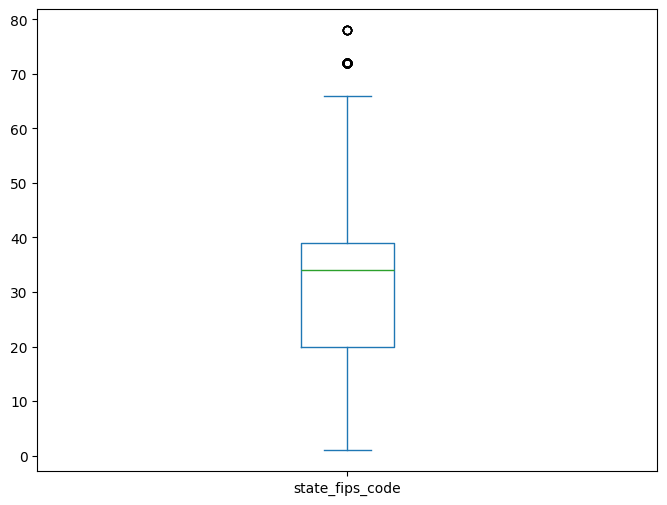

In [58]:
# Plot a boxplot for the continuous feature 'state_fips_code'
plt.figure()
df['state_fips_code'].plot(kind='box', figsize=(8, 6))

# Save the plotted boxplot to a file
plt.savefig('CovidData-DataQualityReport-StateFipsCode-Boxplot.png')

# Show the boxplot
plt.show()

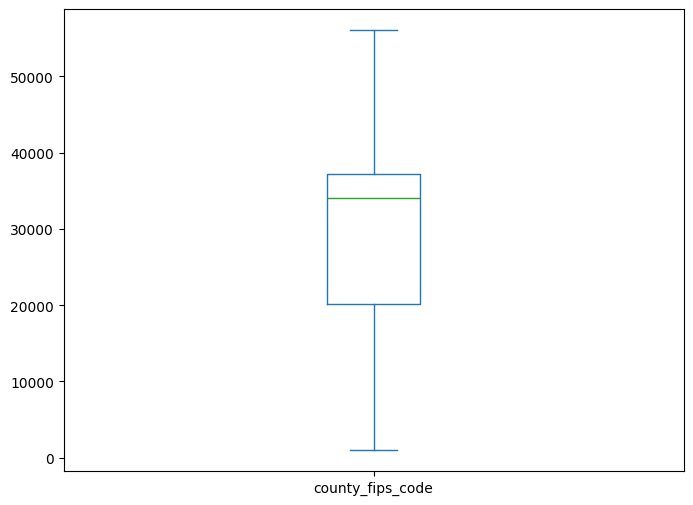

In [59]:
# Plot a boxplot for the continuous feature 'county_fips_code'
plt.figure()
df['county_fips_code'].plot(kind='box', figsize=(8, 6))

# Save the plotted boxplot to a file
plt.savefig('CovidData-DataQualityReport-CountyFipsCode-Boxplot.png')

# Show the boxplot
plt.show()

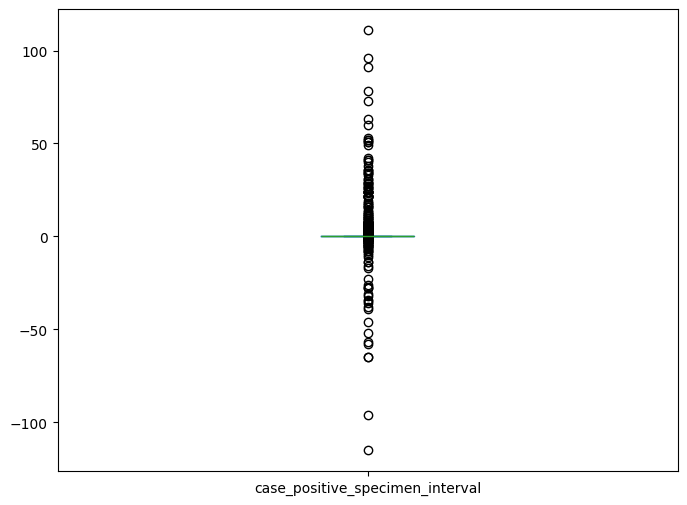

In [60]:
# Plot a boxplot for the continuous feature 'case_positive_specimen_interval'
plt.figure()
df['case_positive_specimen_interval'].plot(kind='box', figsize=(8, 6))

# Save the plotted boxplot to a file
plt.savefig('CovidData-DataQualityReport-CasePositiveSpecimenInterval-Boxplot.png')

# Show the boxplot
plt.show()

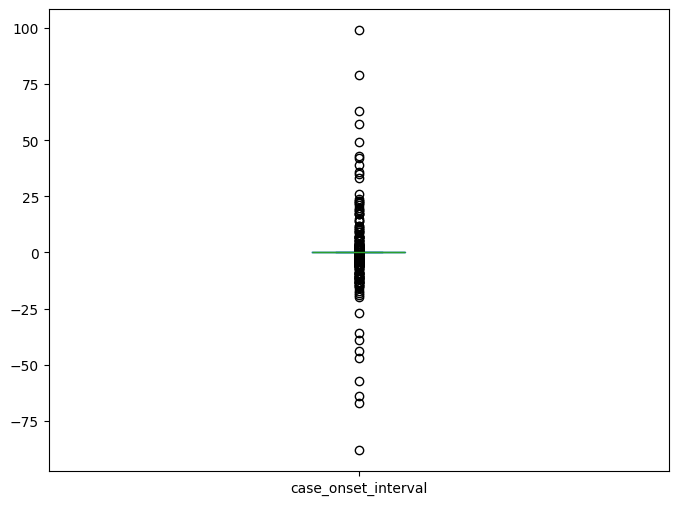

In [61]:
# Plot a boxplot for the continuous feature 'case_onset_interval'
plt.figure()
df['case_onset_interval'].plot(kind='box', figsize=(8, 6))

# Save the plotted boxplot to a file
plt.savefig('CovidData-DataQualityReport-CaseOnsetInterval-Boxplot.png')

# Show the boxplot
plt.show()

As can be seen from the above, both 'case_onset_interval' and 'case_positive_specimen_interval' are not generating true boxplots. This suggests that the box plots have collapsed into a single line, which could be due to many of the data points having the same value. 

I will address this further later in the process. It may require adjusting the plotting parameters, visualising the data in an alternate manner or applying a data transformation technique to spread out the data points. 

I will now plot barplots for each of the categorical features. In order to make the generated tables manageable for the data quality report, I have opted to generate and save the bar plots in groups of three or less at a time. 

In order to avoid repeating this after every barplot, I will note now that each barplot displays the values 'nan', 'unknown' and 'missing'. This is confusing for someone reading the barplots and would need to be dealt with, in order to produce a cohesive report. 

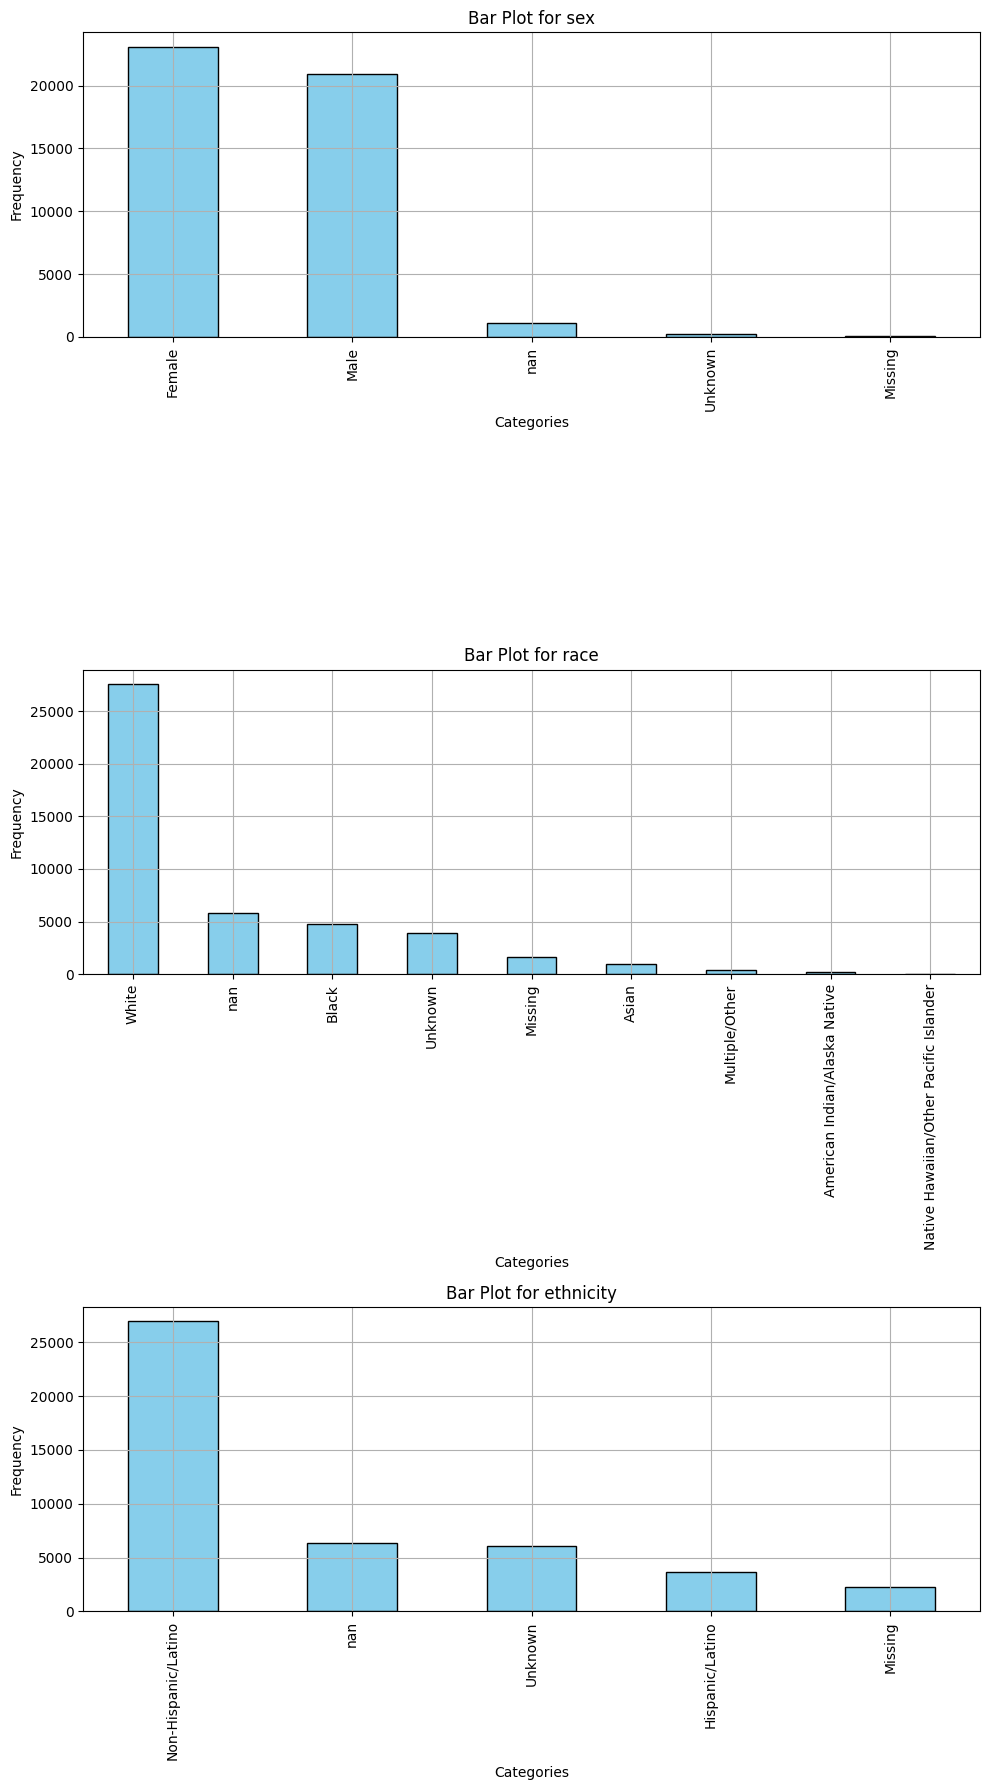

In [72]:
# Select three features to plot 
categorical_features = ['sex', 'race', 'ethnicity']  

# Create a figure
plt.figure(figsize=(10, len(categorical_features) * 6))

# Create subplots for each categorical feature
for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i+1)  
    df[feature].value_counts(dropna=False).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Bar Plot for {feature}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.grid(True)

# Adjust layout
plt.tight_layout()

# Save the bar plots to a file
plt.savefig('CovidData-DataQualityReport-CategoricalFeatures-SexRaceEthnicity-BarPlots.png')

# Show the bar plots
plt.show()


Apart from the noted issues with nan/missing/unkown, the above bar plots have come out well and would be suitable for inclusion in the report. 

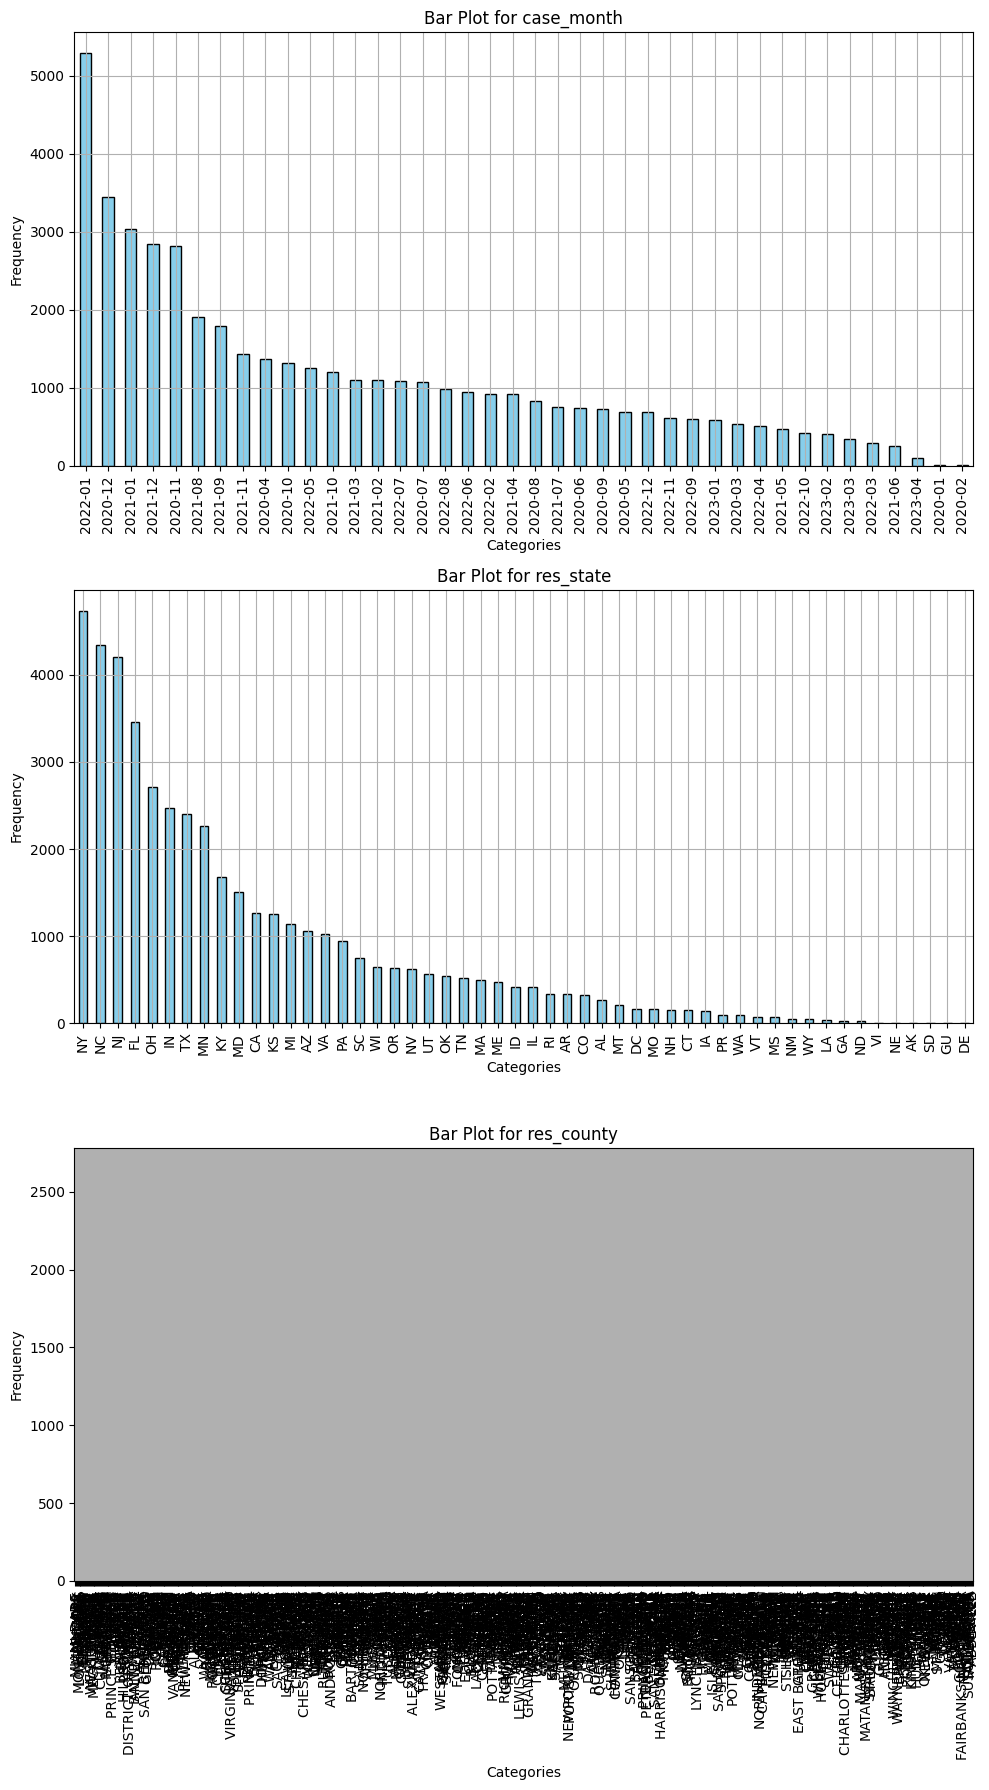

In [73]:
# Selecting another three features to plot 
categorical_features = ['case_month', 'res_state', 'res_county']   

# Create a figure
plt.figure(figsize=(10, len(categorical_features) * 6))

# Create subplots for each categorical feature
for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i+1)  
    df[feature].value_counts(dropna=False).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Bar Plot for {feature}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.grid(True)

# Adjust layout
plt.tight_layout()

# Save the bar plots to a file
plt.savefig('CovidData-DataQualityReport-CategoricalFeatures-MonthStateCounty-BarPlots.png')

# Show the bar plots
plt.show()


Both 'res_state' and 'case_month' are somewhat hard to read, due to the small size of each column. However, 'res_county' displays huge issues - it has not managed to plot a successful bar plot at all. This requires further investigation. 

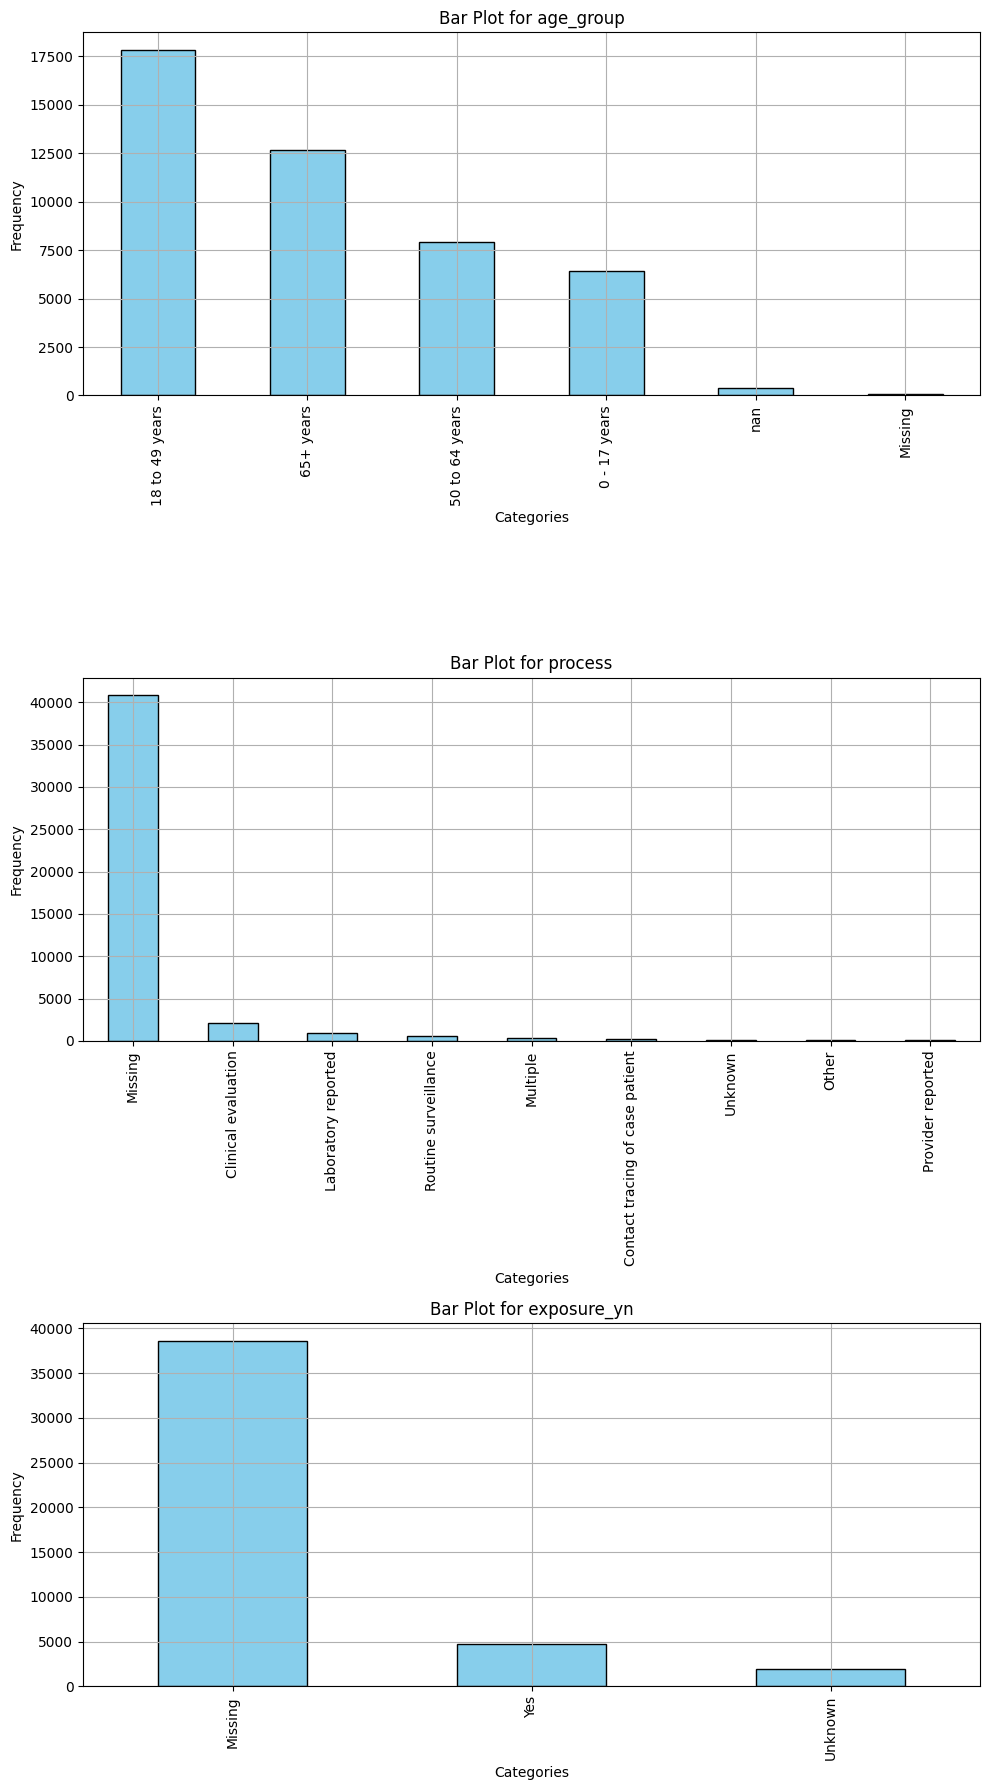

In [74]:
# Selecting another three features to plot 
categorical_features = ['age_group', 'process', 'exposure_yn']   

# Create a figure
plt.figure(figsize=(10, len(categorical_features) * 6))

# Create subplots for each categorical feature
for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i+1)  
    df[feature].value_counts(dropna=False).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Bar Plot for {feature}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.grid(True)

# Adjust layout
plt.tight_layout()

# Save the bar plots to a file
plt.savefig('CovidData-DataQualityReport-CategoricalFeatures-AgeProcessExposure-BarPlots.png')

# Show the bar plots
plt.show()

There were mixed results from this set of bar plots. The 'age_group' bar plot is relatively clean. However, there is so much data missing from the 'exposure_yn' and 'process' sections that their respective graphs are extremely difficult to utilise. In the case of 'process', the missing value dwarfs the other values to such an extent that it becomes almost impossible to discern the values of the other columns.  

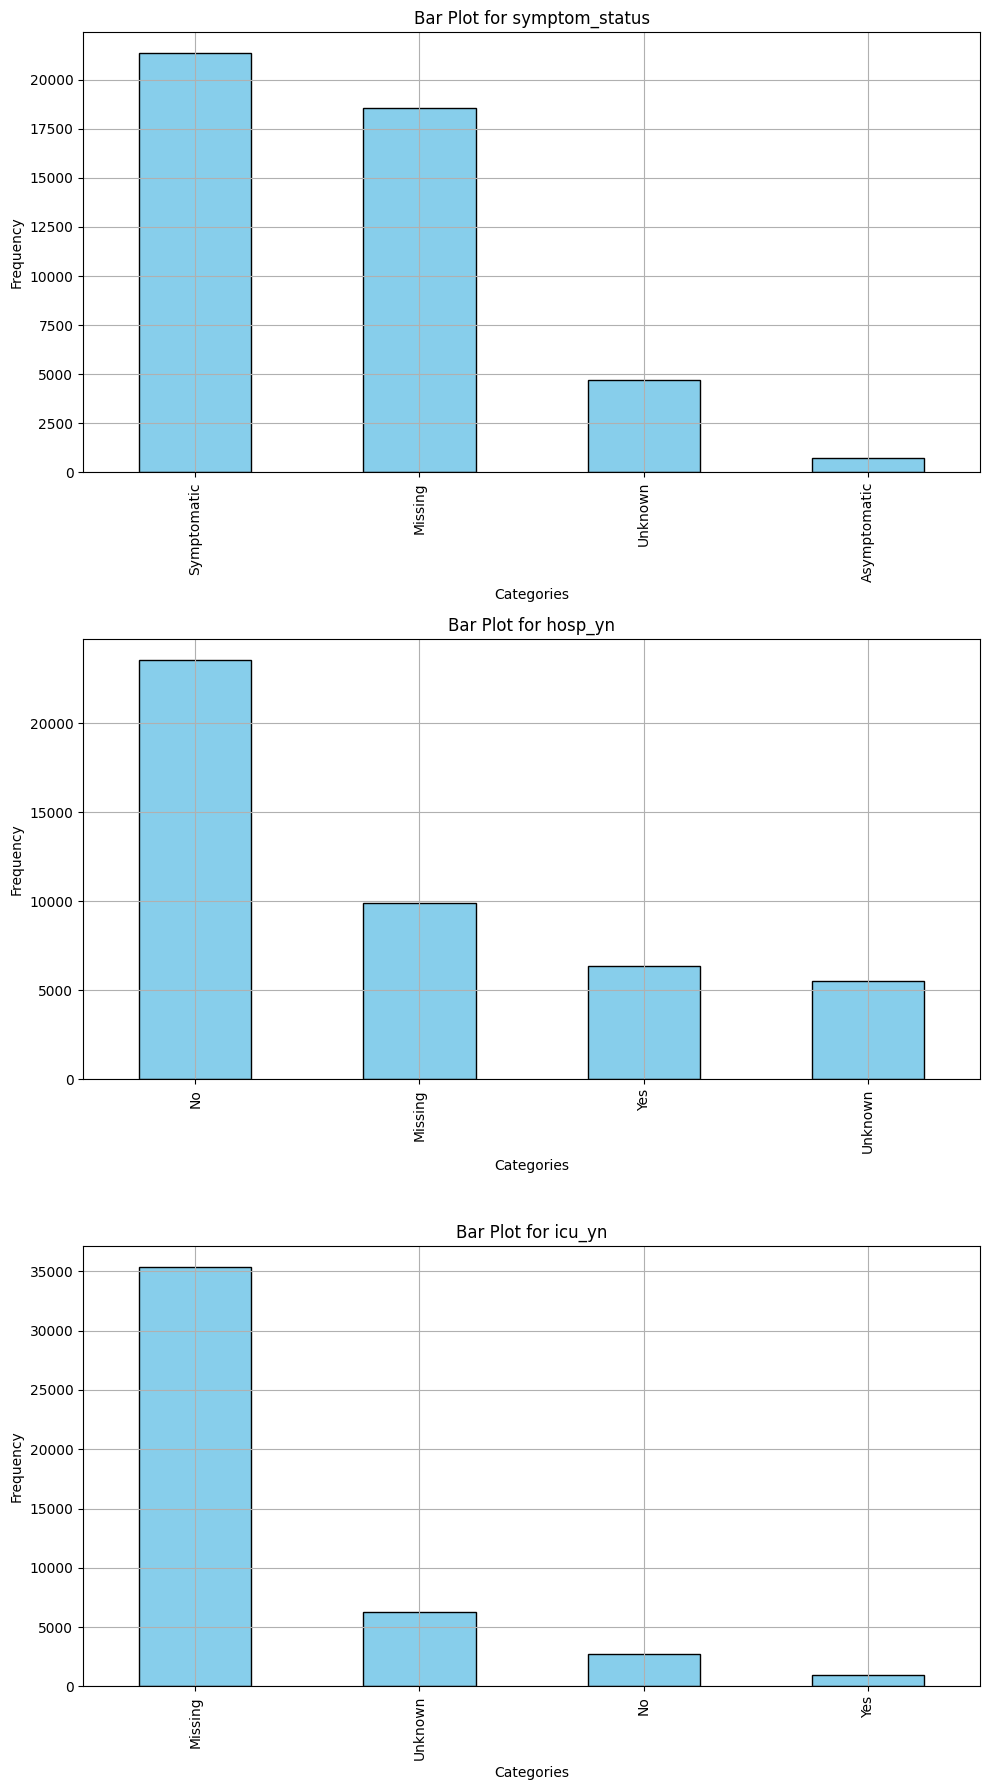

In [75]:
# Selecting another three features to plot 
categorical_features = ['symptom_status', 'hosp_yn', 'icu_yn']   

# Create a figure
plt.figure(figsize=(10, len(categorical_features) * 6))

# Create subplots for each categorical feature
for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i+1)  
    df[feature].value_counts(dropna=False).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Bar Plot for {feature}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.grid(True)

# Adjust layout
plt.tight_layout()

# Save the bar plots to a file
plt.savefig('CovidData-DataQualityReport-CategoricalFeatures-SymptomHospICU-BarPlots.png')

# Show the bar plots
plt.show()

The graphs generated from these columns are relatively clean and easy to read. 

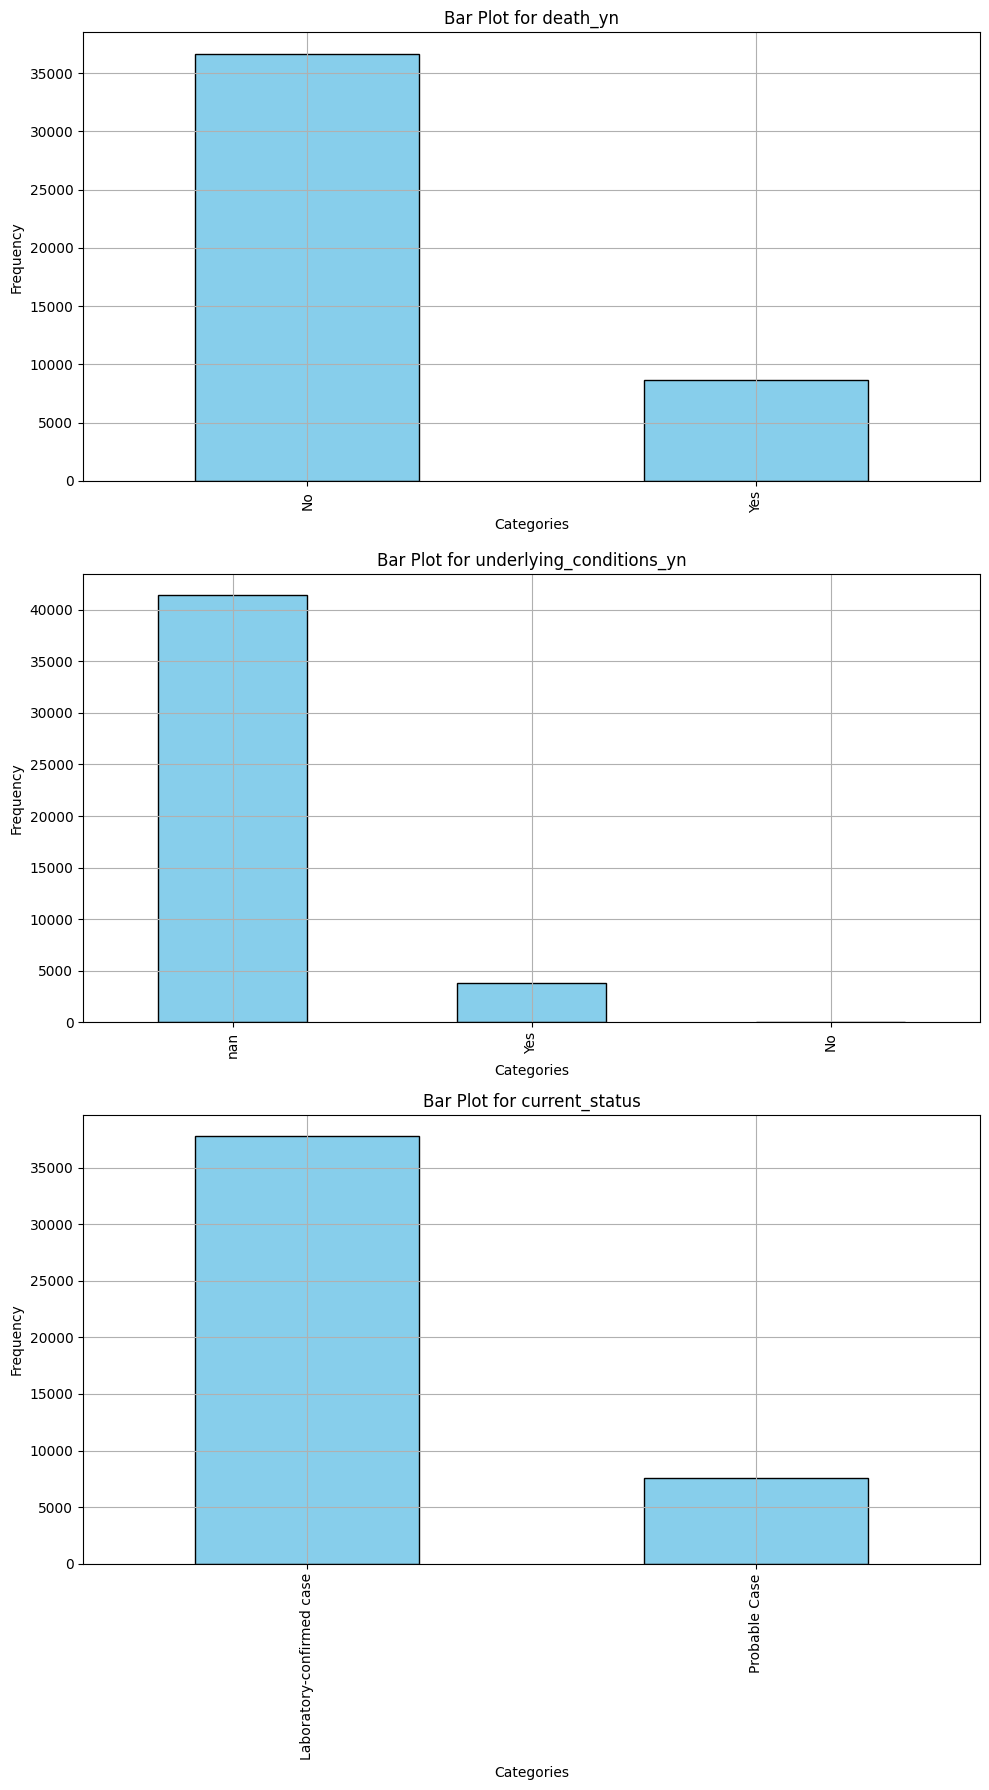

In [76]:
# Selecting another three features to plot 
categorical_features = ['death_yn', 'underlying_conditions_yn', 'current_status']   

# Create a figure
plt.figure(figsize=(10, len(categorical_features) * 6))

# Create subplots for each categorical feature
for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i+1)  
    df[feature].value_counts(dropna=False).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Bar Plot for {feature}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.grid(True)

# Adjust layout
plt.tight_layout()

# Save the bar plots to a file
plt.savefig('CovidData-DataQualityReport-CategoricalFeatures-DeathUnderlyingStatus-BarPlots.png')

# Show the bar plots
plt.show()

Aside from the mentioned issue with 'nan', this graphs are quite comprehensive and easy to follow. 

At this point, I produced the data quality report and began work on the data quality plan. In order to plan to correct the missing values of the dataset, I needed to conduct the Chi-Square test. The code for this test is below. 

In [3]:
# Load the cleaned dataset
data = pd.read_csv('cleaned_data.csv')

# Selecting columns of interest (as per noted columns in Data Quality Plan)
columns_of_interest = ['sex', 'race', 'ethnicity', 'process', 'exposure_yn', 'symptom_status', 'hosp_yn', 'icu_yn']
data_subset = data[columns_of_interest]

#Contingency table of observed frequencies 
contingency_table = pd.crosstab(index=data_subset['sex'], columns=data_subset['race'])

# Perform chi-square test
chi2_stat, p_val, dof, expected_frequencies = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected_frequencies)


Chi-square statistic: 606.807686529997
P-value: 5.915849227345508e-115
Degrees of freedom: 21
Expected frequencies:
[[9.10625395e+01 5.12357622e+02 2.48433262e+03 8.69280909e+02
  2.20852826e+02 5.23347928e+00 2.07088775e+03 1.44239923e+04]
 [8.21888082e+01 4.62430133e+02 2.24224295e+03 7.84572473e+02
  1.99331477e+02 4.72349472e+00 1.86908686e+03 1.30184238e+04]
 [1.14499760e-01 6.44225659e-01 3.12373769e+00 1.09301207e+00
  2.77694819e-01 6.58044595e-03 2.60388246e+00 1.81363671e+01]
 [6.34152514e-01 3.56801903e+00 1.73007011e+01 6.05360533e+00
  1.53800208e+00 3.64455468e-02 1.44215029e+01 1.00447572e+02]]


This suggests that there is a significant association between the variables being tested. Further discussion of this code output will be in the Data Quality Report - it is remaining in this Jupyter notebook for posterity and for demonstration of the solution strategy selection. 

The code below was utilised in the production of the Data Quality Plan. It is an evaluation of the distribution of the data in the 'case_onset_interval' column and is being used to establish how best to correct the issue of an incorrectly visualising box plot. 

In [4]:
#Ensure correct file is being read in. 
df = pd.read_csv('cleaned_data.csv')

# Calculate mean
mean_value = df['case_onset_interval'].mean()

# Calculate median
median_value = df['case_onset_interval'].median()

# Calculate quartiles
quartiles = df['case_onset_interval'].quantile([0.25, 0.5, 0.75])

print("Mean:", mean_value)
print("Median:", median_value)
print("Quartiles:")
print(quartiles)


Mean: -0.03696517412935323
Median: 0.0
Quartiles:
0.25    0.0
0.50    0.0
0.75    0.0
Name: case_onset_interval, dtype: float64


This test has revealed that the majority of the values are clustered around 0, with little/no variability. Therefore, it is unsurprising that the box plot did not visualise. Further evaluation of this is available in the Data Quality Plan. 

Below, the same test has been conducted (for the same reasons) for the column 'case_positive_specimen_interval'.

In [5]:
# Calculate mean
second_mean_value = df['case_positive_specimen_interval'].mean()

# Calculate median
second_median_value = df['case_positive_specimen_interval'].median()

# Calculate quartiles
second_quartiles = df['case_positive_specimen_interval'].quantile([0.25, 0.5, 0.75])

print("Mean:", second_mean_value)
print("Median:", second_median_value)
print("Quartiles:")
print(second_quartiles)

Mean: 0.17703605908078224
Median: 0.0
Quartiles:
0.25    0.0
0.50    0.0
0.75    0.0
Name: case_positive_specimen_interval, dtype: float64


As with the previous test, this has revealed that there is very little variance in the data of this column and the majority of the values are clustered at/around 0. Further discussion of this is available in the Data Quality Plan. 

c:\Users\niamh\anaconda3\envs\datahomework1\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.



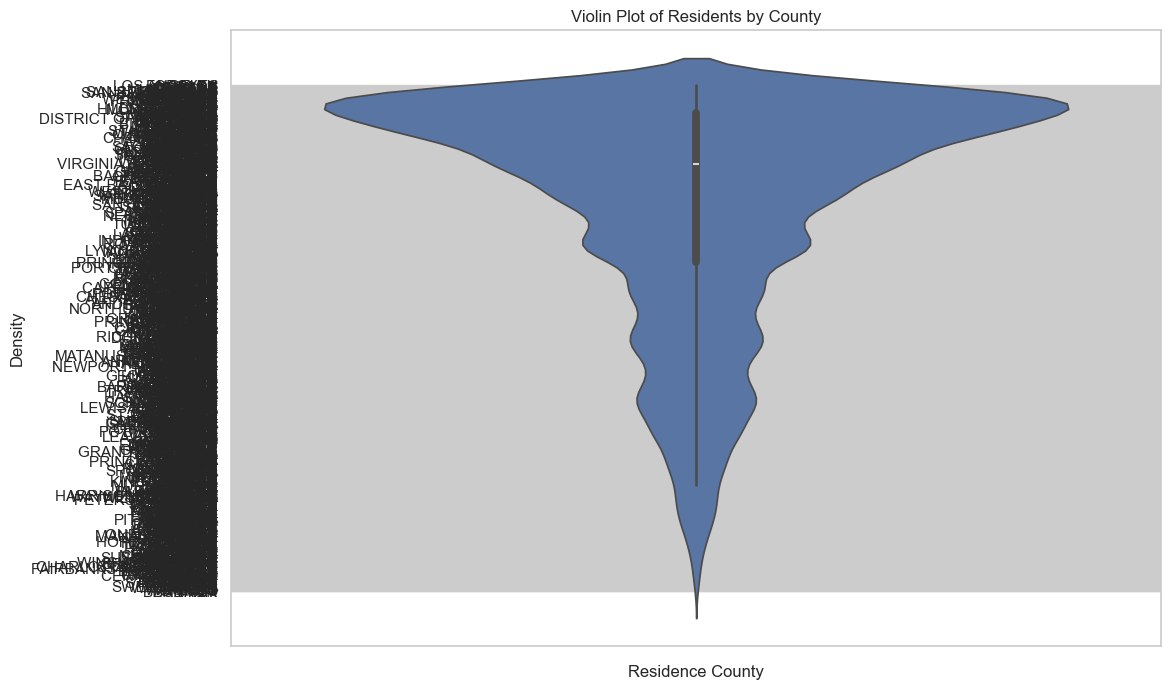

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'res_county' is the column you want to visualize
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.violinplot(y='res_county', data=df)
plt.xlabel('Residence County')
plt.ylabel('Density')
plt.title('Violin Plot of Residents by County')
plt.show()


This section is for the data quality plan: needs to be sequentially integrated into the work and have a text explanation of what it is. 

In [31]:
data = {'county': ['County A', 'County B', 'County A', 'County C', 'County A']}
df = pd.DataFrame(data)

# Count occurrences of each county
county_counts = df['county'].value_counts()

# Calculate average incidence
average_incidence = county_counts.mean()
print(f"Average incidence per county: {average_incidence:.2f}")

# Identify potential outliers (positive - exceeding 1.01 times the average, negative - below 0.9 times)
positive_outlier_threshold = 1.1 * average_incidence
negative_outlier_threshold = 0.8 * average_incidence
positive_outliers = county_counts[county_counts > positive_outlier_threshold]
negative_outliers = county_counts[county_counts < negative_outlier_threshold]

# Count number of counties exceeding and below the average
num_exceeding_average = (county_counts > average_incidence).sum()
num_below_average = (county_counts < negative_outlier_threshold).sum()

# Print results
print(f"{num_exceeding_average} counties exceed the average incidence.")
print(f"{num_below_average} counties fall below {negative_outlier_threshold:.2f} times the average incidence.")


Average incidence per county: 1.67
1 counties exceed the average incidence.
2 counties fall below 1.33 times the average incidence.
